### Bootstrap

#### Packages

In [91]:
import pandas as pkg_pandas
import numpy as pkg_numpy
from matplotlib import pyplot as pkg_plot
from sklearn import linear_model as pkg_linear_model
from sklearn import model_selection as pkg_model_selection
from sklearn import datasets as pkg_datasets
from sklearn import metrics as pkg_metrics
import seaborn as pkg_seaborn

#### Load Data

In [92]:
loaded_baseline_data = pkg_datasets.load_digits()
dir(loaded_baseline_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [93]:
loaded_baseline_data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [94]:
loaded_baseline_data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [95]:
loaded_baseline_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

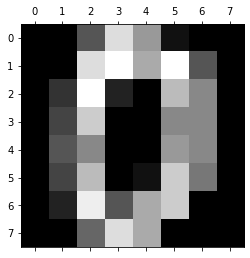

In [96]:
pkg_plot.gray()
pkg_plot.matshow(loaded_baseline_data.images[0])

### Analysis

#### Pre-Work

In [97]:
baseline_inputs = loaded_baseline_data.data
baseline_outputs = loaded_baseline_data.target

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 1797, Train = 1347, Test = 450


In [98]:
train_outputs[0:5]

array([4, 8, 9, 5, 9])

#### Model: Train (Fit)

In [99]:
model = pkg_linear_model.LogisticRegression(max_iter=4000)
model.fit(X=train_inputs, y=train_outputs)
model

LogisticRegression(max_iter=4000)

In [100]:
model.score(X=test_inputs, y=test_outputs)

0.96

#### Model: Test (Predict)

In [101]:
predicted_outputs = model.predict(test_inputs)
len(predicted_outputs)

450

Index = 0, Predicted = 0, Actual = 0
Index = 1, Predicted = 1, Actual = 1
Index = 4, Predicted = 4, Actual = 4
Index = 9, Predicted = 9, Actual = 9
Index = 16, Predicted = 6, Actual = 6
Index = 25, Predicted = 5, Actual = 5
Index = 36, Predicted = 0, Actual = 0
Index = 49, Predicted = 0, Actual = 0
Index = 64, Predicted = 4, Actual = 4
Index = 81, Predicted = 7, Actual = 7


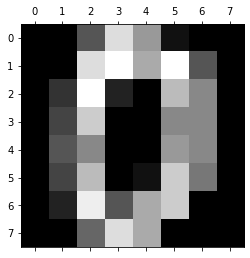

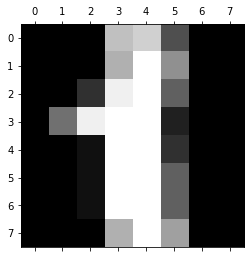

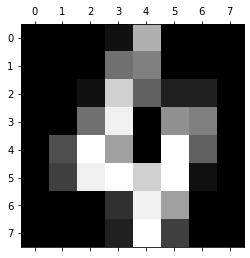

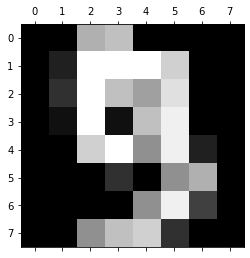

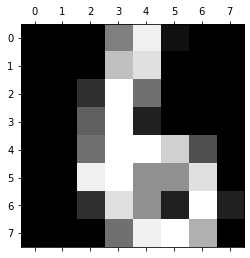

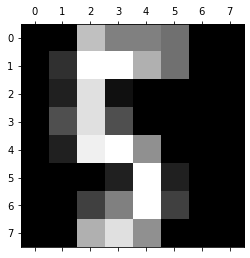

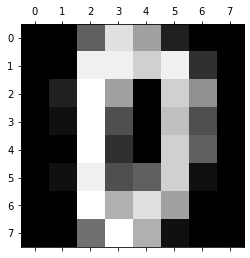

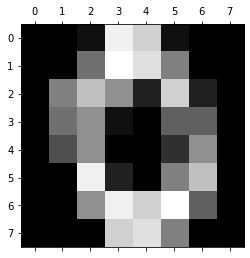

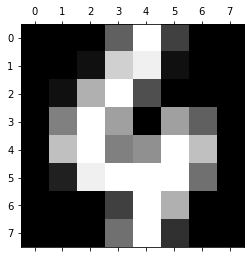

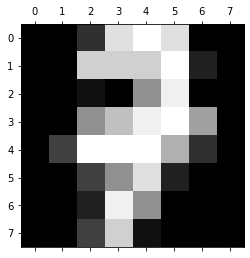

In [102]:
for i in range(10):
    index = i*i
    predicted = model.predict([loaded_baseline_data.data[index]])
    actual = loaded_baseline_data.target[index]
    pkg_plot.matshow(loaded_baseline_data.images[index])
    print("Index = {}, Predicted = {}, Actual = {}".format(index, predicted[0], actual))

#### Confusion Matrix

In [103]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=predicted_outputs)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 46,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 49,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 38,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  3, 39]])

<AxesSubplot:>

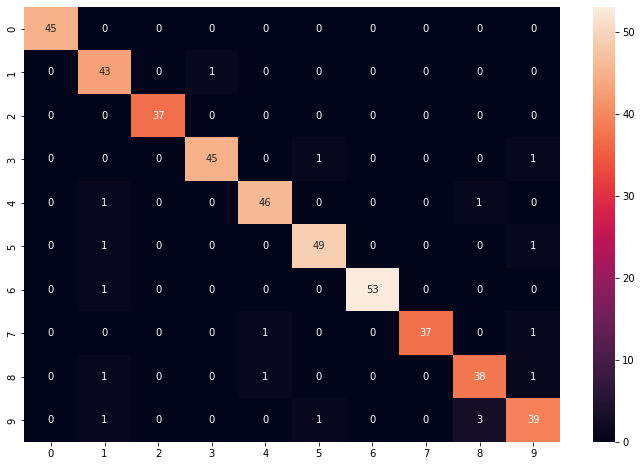

In [104]:
pkg_plot.figure(figsize=(12,8))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)